In this notebook we are showing link_type distribution for each language in specific month  

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from math import log10

In [4]:
def categorical_data_features(current_df, 
                             categorical_column_name, 
                             response_column_name):
    """
    Generate visualizations for categorical data features.

    Parameters:
    current_df (DataFrame): The input DataFrame containing the data.
    categorical_column_name (str): The name of the categorical column.
    response_column_name (str): The name of the response column.

    Returns:
    None
    """
  
    df = pd.DataFrame()
  
    df[categorical_column_name] = current_df[categorical_column_name]
    df[response_column_name] = current_df[response_column_name]

    df = df.dropna()
    df.shape
    bins = int(1 + 3.22*log10(len(df[response_column_name])))
    category_counts = df[categorical_column_name].value_counts()

    # Create a stacked bar chart to show the response distribution for each category
    cross_tab = pd.crosstab(df[categorical_column_name], df[response_column_name])

    # Create the stacked bar chart
    ax = cross_tab.plot(kind='bar', stacked=True)
    plt.xlabel(categorical_column_name)
    plt.ylabel('Count')
    title = response_column_name+' distribution for Each '+ categorical_column_name
    plt.title(title)
    plt.show()


Load data from database to DataFrame

In [13]:
import pandas as pd

from utils.db import PostGreSQL
from utils.utils import read_db_config

# Establish a connection to the PostgreSQL database
db = PostGreSQL()

db_config = read_db_config("DATABASE")
db.connect(db_config)

# Execute the SQL query
query = "SELECT * FROM wiki WHERE month = '2017-12' LIMIT 1000;"
rows = db.fetch(query)


# Create a pandas DataFrame from the fetched rows
df = pd.DataFrame(rows, columns=['referrer', 'resource', 'link_type', 'count', 'lang', 'month'])
df

,referrer,resource,link_type,count,lang,month
0,Syslinux,PXE,link,19,ru,2017-12
1,Lm,L&M,link,55,ru,2017-12
2,Marlboro,L&M,link,29,ru,2017-12
3,Symbian_OS,Palm_OS,link,25,ru,2017-12
4,Level-5,Dark_Cloud,link,22,ru,2017-12
...,...,...,...,...,...,...
995,other-empty,Маньков_(Речицкий_район),external,311,ru,2017-12
996,other-empty,Список_астероидов_(214501—214600),external,66,ru,2017-12
997,other-search,Идеальное_создание,external,62,ru,2017-12
998,other-empty,Идеальное_создание,external,108,ru,2017-12


we are showing link_type distribution for each language in specific month

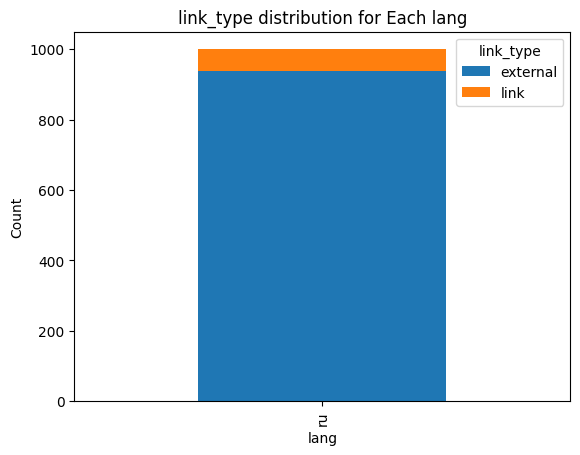

In [14]:
categorical_data_features(df, 'lang', 'link_type')